# Machine Learning Assignment


# Regression

##### Question 1 (a)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
abalone_df = pd.read_csv('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_2/abalone.csv', 
                         delimiter=',', header=None)

In [3]:
X = abalone_df.drop(columns=[7])
y = abalone_df[7] 

In [4]:
train_errors = np.zeros(20)
test_errors = np.zeros(20)

In [5]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    
    train_pred_null = np.full_like(y_train, np.mean(y_train))
    test_pred_null  = np.full_like(y_test, np.mean(y_train))
    
    train_errors[i] = mean_squared_error(y_train, train_pred_null)
    test_errors[i]  = mean_squared_error(y_test, test_pred_null)
    
null_avg_train_MSE = np.mean(train_errors)
null_avg_test_MSE  = np.mean(test_errors)

In [6]:
tbl_1a = {
    'avg_train_MSE': null_avg_train_MSE ,
    'avg_test_MSE': null_avg_test_MSE,
}

tbl_1a_df = pd.DataFrame(tbl_1a, index=[0])
print(tbl_1a_df)

   avg_train_MSE  avg_test_MSE
0      11.239558     11.489234


##### Question 1 (b)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from numpy.linalg import slogdet

In [8]:
train_r2 = np.zeros(20)
test_r2 = np.zeros(20)
train_mse = np.zeros(20)
test_mse = np.zeros(20)
log_det_values = np.zeros(20)

In [9]:
lambda_value = 0.001

In [10]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)

   
    X_train_transpose = np.transpose(X_train)
    coefficients = np.linalg.inv(X_train_transpose @ X_train + lambda_value * np.eye(X_train.shape[1]))
    @ X_train_transpose @ y_train
    
    pred_train = X_train @ coefficients
    pred_test = X_test @ coefficients

    train_r2[i]   = r2_score(y_train, pred_train)
    test_r2[i]    = r2_score(y_test, pred_test)
    train_mse[i]  = mean_squared_error(y_train, pred_train)
    test_mse[i]   = mean_squared_error(y_test, pred_test)

    
    log_det_model = X_train_transpose @ X_train + 0.001 * np.eye(X_train.shape[1])
    log_det_values[i] = np.linalg.slogdet(log_det_model)[1]
    
avg_train_r2 = np.mean(train_r2)
avg_test_r2  = np.mean(test_r2)
std_train_r2 = np.std(train_r2)
std_test_r2  = np.std(test_r2)

avg_train_mse = np.mean(train_mse)
avg_test_mse  = np.mean(test_mse)
std_train_mse = np.std(train_mse)
std_test_mse  = np.std(test_mse)

avg_log_det = np.mean(log_det_values)
std_log_det = np.std(log_det_values)
    

In [11]:
print("------------MSE-------------------------")  
print("avg_train_MSE:" ,avg_train_mse)
print("std_train_MSE:" ,std_train_mse)
print("avg_test_MSE:" ,avg_test_mse)
print("std_test_MSE:", std_test_mse)
print()
print("------------R2--------------------------")   
print("avg_train_r2:" ,avg_train_r2)
print("std_train_r2:" ,std_train_r2)
print("avg_test_r2:" ,avg_test_r2)
print("std_test_r2:" ,std_test_r2)
print()
print("------------Log_Det_Model--------------------------")    
print("avg_log_det_model:",avg_log_det)
print("std_log_det_model:",std_log_det)
print()

------------MSE-------------------------
avg_train_MSE: 5.047016141555082
std_train_MSE: 0.06178623205918878
avg_test_MSE: 5.162840550623892
std_test_MSE: 0.6402633558615307

------------R2--------------------------
avg_train_r2: 0.5133276110555863
std_train_r2: 0.00525490008252999
avg_test_r2: 0.5110943838849796
std_test_r2: 0.05028649494487582

------------Log_Det_Model--------------------------
avg_log_det_model: 18.254963707756822
std_log_det_model: 0.17387355126049642



##### Question 1 (c)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
tree_depth= range(1,8)
avg_train_r2 = []
avg_test_r2 = []
avg_train_mse = []
avg_test_mse = []

In [14]:
for i in tree_depth:
    train_r2 = []
    test_r2 = []
    train_mse = []
    test_mse = []
    
    for j in range(20):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=j)

        model = DecisionTreeRegressor(max_depth=i)
        model.fit(X_train, y_train)

        pred_train = model.predict(X_train)
        pred_test  = model.predict(X_test)

        train_r2.append(r2_score(y_train, pred_train))
        test_r2.append(r2_score(y_test, pred_test))
        
        train_mse.append(mean_squared_error(y_train, pred_train))
        test_mse.append(mean_squared_error(y_test, pred_test))
    
    avg_train_r2.append(np.mean(train_r2))
    avg_test_r2.append(np.mean(test_r2))
    
    avg_train_mse.append(np.mean(train_mse))
    avg_test_mse.append(np.mean(test_mse))
    

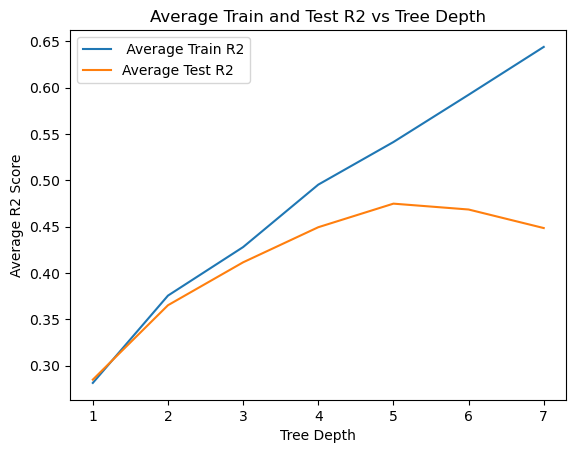

In [15]:
plt.plot(tree_depth, avg_train_r2, label=' Average Train R2')
plt.plot(tree_depth, avg_test_r2, label='Average Test R2')
plt.xlabel('Tree Depth')
plt.ylabel('Average R2 Score')
plt.title('Average Train and Test R2 vs Tree Depth')
plt.legend()
plt.show()

In [16]:
null_model_train_mse =  null_avg_train_MSE  
null_model_test_mse  = null_avg_test_MSE

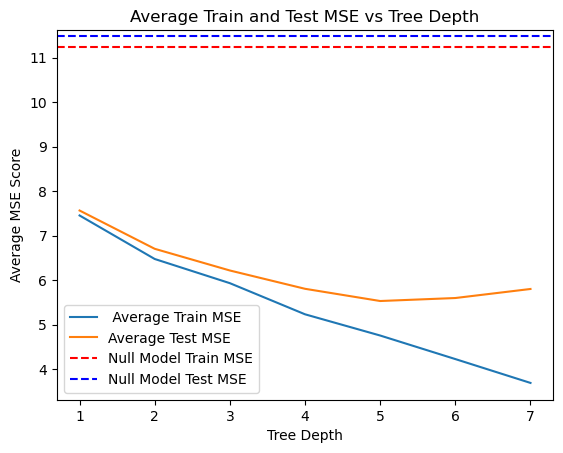

In [17]:
plt.plot(tree_depth, avg_train_mse, label=' Average Train MSE')
plt.plot(tree_depth, avg_test_mse, label='Average Test MSE')
plt.axhline(y=null_model_train_mse, color='r', linestyle='--', label='Null Model Train MSE')
plt.axhline(y=null_model_test_mse, color='b', linestyle='--', label='Null Model Test MSE')
plt.xlabel('Tree Depth')
plt.ylabel('Average MSE Score')
plt.title('Average Train and Test MSE vs Tree Depth')
plt.legend()
plt.show()

##### Question 1 (d)

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf_tree_nos= [10, 30, 100, 300]


In [20]:
for i in rf_tree_nos:
  
    train_r2_list = []
    test_r2_list = []
    train_mse_list = []
    test_mse_list = []
    
    for j in range(20):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=j)

        Rf_clf = RandomForestRegressor(n_estimators=i)
        Rf_clf.fit(X_train, y_train)

        pred_train = Rf_clf.predict(X_train)
        pred_test  = Rf_clf.predict(X_test)
        
        train_r2    = r2_score(y_train, pred_train)
        test_r2     = r2_score(y_test, pred_test)
        train_mse   = mean_squared_error(y_train, pred_train)
        test_mse    = mean_squared_error(y_test, pred_test)
        
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        
    
    avg_train_r2 = np.mean(train_r2_list)
    avg_test_r2 =  np.mean(test_r2_list)
    std_train_r2 = np.std(train_r2_list)
    std_test_r2  = np.std(test_r2_list)
    
    avg_train_mse = np.mean(train_mse_list)
    avg_test_mse  = np.mean(test_mse_list)
    std_train_mse = np.std(train_mse_list)
    std_test_mse  = np.std(test_mse_list)
    
    print("For Estimator:",i)  
    print("------------MSE-------------------------")  
    print("avg_train_MSE:" ,avg_train_mse)
    print("std_train_MSE:" ,std_train_mse)
    print("avg_test_MSE:" ,avg_test_mse)
    print("std_test_MSE:", std_test_mse)
    print("------------R2--------------------------")   
    print("avg_train_r2:" ,avg_train_r2)
    print("std_train_r2:" ,std_train_r2)
    print("avg_test_r2:" ,avg_test_r2)
    print("std_test_r2:" ,std_test_r2)
    print()

For Estimator: 10
------------MSE-------------------------
avg_train_MSE: 0.9275453578079278
std_train_MSE: 0.02890155587819018
avg_test_MSE: 5.208895933014356
std_test_MSE: 0.3965170252522973
------------R2--------------------------
avg_train_r2: 0.9105631882031971
std_train_r2: 0.0025956330919596816
avg_test_r2: 0.5048417796711983
std_test_r2: 0.049281829999557304

For Estimator: 30
------------MSE-------------------------
avg_train_MSE: 0.7330048919629925
std_train_MSE: 0.018368120809102315
avg_test_MSE: 4.943566188197766
std_test_MSE: 0.35534426667077795
------------R2--------------------------
avg_train_r2: 0.9293205333820371
std_train_r2: 0.0016177433746724053
avg_test_r2: 0.5305325118901623
std_test_r2: 0.039281914520497715

For Estimator: 100
------------MSE-------------------------
avg_train_MSE: 0.6700905905826019
std_train_MSE: 0.012670073944914389
avg_test_MSE: 4.819219258373205
std_test_MSE: 0.38713832679406257
------------R2--------------------------
avg_train_r2: 0.93538